In [1]:
'''Importing all used libraries so it only has to be done once.
This code has to be ran before trying to run any other code!!!
you will know the importing is done once the message "importing done!" shows.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("importing done!")

importing done!


In [2]:
# 1a) Loading the dataset.
data = pd.read_csv('SpotifyFeatures.csv')

# Display the number of samples and features
num_samples, num_features = data.shape
print("Number of samples:", num_samples)
print("Number of features:", num_features)

Number of samples: 232725
Number of features: 18


In [3]:
# 1b) Creating labels.
pop_classical = data[(data['genre'] == 'Pop') | (data['genre'] == 'Classical')].copy()

# Create labels: Pop = 1, Classical = 0
pop_classical['label'] = pop_classical['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Count the number of samples in each class and display them
pop_count = pop_classical[pop_classical['label'] == 1].shape[0]
classical_count = pop_classical[pop_classical['label'] == 0].shape[0]
print("Number of Pop samples:", pop_count)
print("Number of Classical samples:", classical_count)

Number of Pop samples: 9386
Number of Classical samples: 9256


In [4]:
# 1c) splitting into test and training sets.
# Select 'liveness' and 'loudness' as features
X_pop = pop_classical[pop_classical['label'] == 1][['liveness', 'loudness']].values
y_pop = pop_classical[pop_classical['label'] == 1]['label'].values

X_classical = pop_classical[pop_classical['label'] == 0][['liveness', 'loudness']].values
y_classical = pop_classical[pop_classical['label'] == 0]['label'].values

# Function to split data into 80% training and 20% test
def train_test_split_manual(X, y, test_size=0.2):
    n = X.shape[0]
    n_train = int(n * (1 - test_size))
    
    # Shuffle
    indices = np.arange(n)
    np.random.shuffle(indices)
    
    # Split based on shuffle
    X_train, X_test = X[indices[:n_train]], X[indices[n_train:]]
    y_train, y_test = y[indices[:n_train]], y[indices[n_train:]]
    
    return X_train, X_test, y_train, y_test

# Split Pop and Classical data separately
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split_manual(X_pop, y_pop)
X_train_classical, X_test_classical, y_train_classical, y_test_classical = train_test_split_manual(X_classical, y_classical)

# Combine Pop and Classical splits to form final training and test sets
X_train = np.vstack((X_train_pop, X_train_classical))
y_train = np.hstack((y_train_pop, y_train_classical))

X_test = np.vstack((X_test_pop, X_test_classical))
y_test = np.hstack((y_test_pop, y_test_classical))

# Shuffle the combined training set
train_indices = np.arange(X_train.shape[0])
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

# Shuffle the combined test set
test_indices = np.arange(X_test.shape[0])
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
y_test = y_test[test_indices]

# display the number of samples of the training and test sets
print("Training set size:", X_train.shape[0] , "samples")
print("Test set size:",  X_test.shape[0] , "samples")

Training set size: 14912 samples
Test set size: 3730 samples


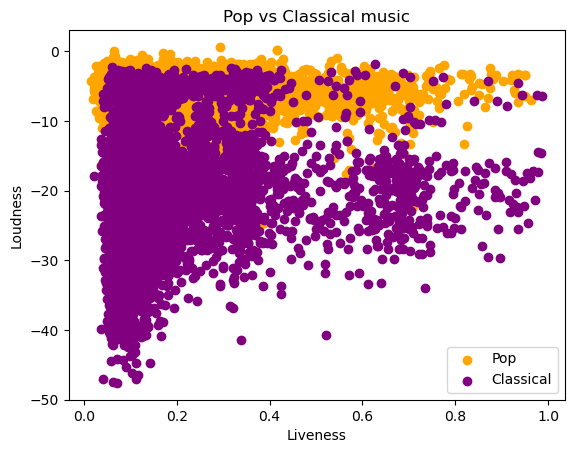

In [5]:
# 1d) Plotting the data.
# plot datapoints for Pop and classical
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Pop')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='purple', label='Classical')

# Generate labels and title
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Pop vs Classical music')
plt.legend()

# Display the plot
plt.show()

In [6]:
#empty to show seperation between problem 1 and 2

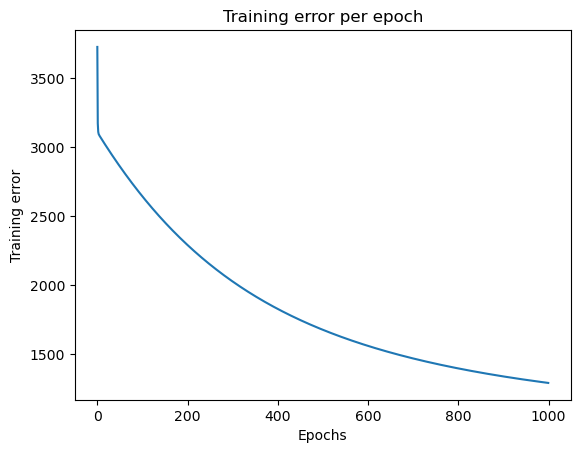

Training Accuracy: 92.05%


In [7]:
# 2a) Logistic regression using SGD.
class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        # Initialize learning rate and epochs
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.training_errors = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape  # Get number of samples and features
        self.weights = np.zeros(n_features)  # Initialize weights to zero
        self.bias = 0  # Initialize bias to zero

        # Loop over the epochs
        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute the loss
            loss = np.sum((y - y_predicted) ** 2)
            self.training_errors.append(loss)

            # Calculate gradients for weights and bias
            dw = -(2/n_samples) * np.dot(X.T, (y - y_predicted))
            db = -(2/n_samples) * np.sum(y - y_predicted)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Plot the training error over epochs
        plt.plot(range(self.epochs), self.training_errors)
        plt.xlabel("Epochs")
        plt.ylabel("Training error")
        plt.title("Training error per epoch")
        plt.show()

    def predict(self, X):
        # Predict binary labels based on the learned weights
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def accuracy(self, y_true, y_pred):
        # Calculate the accuracy by comparing true and predicted labels
        return np.mean(y_true == y_pred)


# Train the model
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predict and display training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = model.accuracy(y_train, y_train_pred)
print("Training Accuracy:" , str(round(train_accuracy * 100, 2)) + "%")

In [8]:
# 2b) Testing the trained model.
y_test_pred = model.predict(X_test)
test_accuracy = model.accuracy(y_test, y_test_pred)
print("Test Accuracy: ", str(round(test_accuracy * 100, 2)) + "%")

Test Accuracy:  91.96%


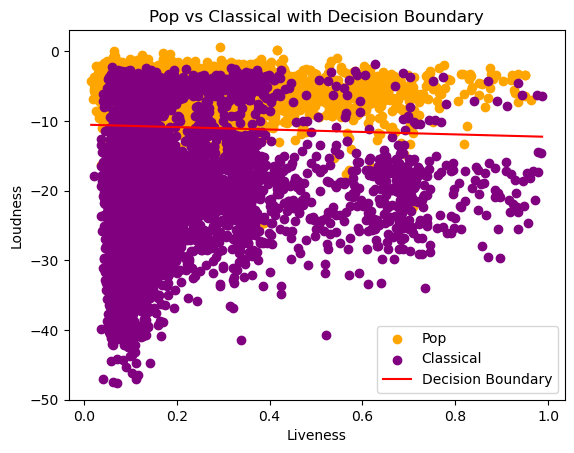

In [9]:
# 2c) Plotting the decision boundary.
# Plot the data points
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Pop')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='purple', label='Classical')

# Plot the decision boundary
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = -(model.weights[0] * x_values + model.bias) / model.weights[1]
plt.plot(x_values, y_values, label='Decision Boundary', color='red')

# Generate labels and title
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Pop vs Classical with Decision Boundary')
plt.legend()

# Display the plot
plt.show()


In [10]:
#empty to show seperation between problem 2 and 3

In [11]:
# 3a) Creating a confusion matrix.
# Initialize the confusion matrix
cm = np.zeros((2, 2), dtype=int)

# Get predictions on the test set
y_test_pred = model.predict(X_test)

# Generate the confusion matrix
for true, pred in zip(y_test, y_test_pred):
    cm[int(true)][int(pred)] += 1

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("with the matrix format being:\n[[classic, classic labeled as pop],\n[pop labeled as classic, pop]]")

Confusion Matrix:
[[1676  176]
 [ 124 1754]]
with the matrix format being:
[[classic, classic labeled as pop],
[pop labeled as classic, pop]]
